In [2]:
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import lightgbm as lgb
sns.set(style='white')

In [3]:
df=pd.read_csv('Product Training and Testing.csv')

In [4]:
df.head()

,Identifier,Product Selection,Product_Activation,R_rank_norm,F_rank_norm,M_rank_norm,M2_rank_norm,RFM_Score,RFM2_Score,Customer_segment,...,ENT_OCCUPATION_Professional,ENT_OCCUPATION_Public,ENT_OCCUPATION_Retired,ENT_OCCUPATION_Student,age_range_18-29,age_range_30-39,age_range_40-49,age_range_50-59,age_range_60-69,age_range_70+
0,110354,1,0,34,68,37,68,45,63,1,...,0,0,0,0,0,0,0,1,0,0
1,110355,1,0,83,24,19,53,30,49,1,...,0,0,0,0,0,1,0,0,0,0
2,110357,1,0,62,55,53,59,55,58,2,...,0,0,0,0,0,1,0,0,0,0
3,110358,1,0,85,24,19,53,30,50,1,...,0,0,0,0,1,0,0,0,0,0
4,110359,1,0,58,73,82,77,76,73,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
df.Product_Activation.value_counts()

0    645822
1     43231
Name: Product_Activation, dtype: int64

In [6]:
df.isnull().sum()

Identifier                      0
Product Selection               0
Product_Activation              0
R_rank_norm                     0
F_rank_norm                     0
M_rank_norm                     0
M2_rank_norm                    0
RFM_Score                       0
RFM2_Score                      0
Customer_segment                0
Customer_segment2               0
ENT_SEX_F                       0
ENT_SEX_M                       0
ENT_SEX_Other                   0
ENT_MARITAL_STATUS_M            0
ENT_MARITAL_STATUS_Other        0
ENT_MARITAL_STATUS_U            0
ENT_OCCUPATION_Government       0
ENT_OCCUPATION_Housewife        0
ENT_OCCUPATION_Other            0
ENT_OCCUPATION_PUBLIC SECTOR    0
ENT_OCCUPATION_Private          0
ENT_OCCUPATION_Professional     0
ENT_OCCUPATION_Public           0
ENT_OCCUPATION_Retired          0
ENT_OCCUPATION_Student          0
age_range_18-29                 0
age_range_30-39                 0
age_range_40-49                 0
age_range_50-5

In [7]:
df.Product_Activation.value_counts()[0]/df.Product_Activation.value_counts()[1]

14.938863315676251

#### Data ratio is 15:1 which is highly imbalanced

In [8]:
import numpy as np
a=np.random.choice(df[df.Product_Activation==0].index,
                   size=len(df[df.Product_Activation==1]),replace=False)

In [9]:
undersampled_df_zero=pd.DataFrame(df,index=a)

In [10]:
undersampled_df_zero

,Identifier,Product Selection,Product_Activation,R_rank_norm,F_rank_norm,M_rank_norm,M2_rank_norm,RFM_Score,RFM2_Score,Customer_segment,...,ENT_OCCUPATION_Professional,ENT_OCCUPATION_Public,ENT_OCCUPATION_Retired,ENT_OCCUPATION_Student,age_range_18-29,age_range_30-39,age_range_40-49,age_range_50-59,age_range_60-69,age_range_70+
219326,352564,1,0,83,24,27,66,34,57,1,...,0,0,0,0,1,0,0,0,0,0
247532,383425,1,0,94,24,55,26,52,36,2,...,0,0,0,0,0,0,1,0,0,0
285838,422964,0,0,42,24,9,26,18,28,1,...,0,0,0,0,0,0,0,1,0,0
337525,476198,1,0,97,24,50,26,50,36,2,...,0,0,0,0,1,0,0,0,0,0
91056,210821,1,0,25,83,85,96,76,82,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615129,762403,1,0,90,55,68,26,68,44,2,...,0,0,0,1,1,0,0,0,0,0
158014,284866,1,0,86,64,83,96,78,86,0,...,0,1,0,0,0,0,0,1,0,0
455910,598183,1,0,98,24,62,26,57,36,2,...,0,0,0,0,0,1,0,0,0,0
293054,430398,1,0,87,86,77,26,81,52,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
undersampled_df=pd.concat([df[df.Product_Activation==1],undersampled_df_zero], axis=0, ignore_index=True)

In [12]:
undersampled_df.Product_Activation.value_counts()

1    43231
0    43231
Name: Product_Activation, dtype: int64

In [13]:
X=undersampled_df.drop(columns=['Product Selection','Product_Activation'])
Y=undersampled_df.Product_Activation

In [14]:
ada_model=AdaBoostClassifier()

In [15]:
xTrain,xTest,yTrain,yTest=train_test_split(X,Y,random_state=42)

In [16]:
ada_model.fit(xTrain,yTrain)

AdaBoostClassifier()

In [17]:
ada_model.predict(xTest)

array([0, 0, 1, ..., 1, 1, 1])

In [18]:
confusion_matrix(ada_model.predict(xTest),yTest)

array([[8981,  996],
       [1773, 9866]])

/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


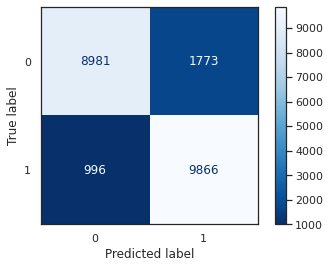

In [19]:
_=metrics.plot_confusion_matrix(ada_model,xTest,yTest,cmap='Blues_r')

In [20]:
ada_model.score(xTest,yTest)

0.8719004441154701

In [21]:
metrics.f1_score(yTest,ada_model.predict(xTest))

0.8769388027198791

In [22]:
cv_ori=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(ada_model, X, Y, scoring=scoring, cv=cv_ori, n_jobs=-1)

In [23]:
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

Mean Accuracy: 0.8723
Mean Precision: 0.8741
Mean Recall: 0.8723


In [24]:
lgbm_model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm_model.fit(xTrain,yTrain,eval_set=[(xTest,yTest),(xTrain,yTrain)],
          verbose=20,eval_metric='logloss')

/home/vikrant/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.31341	valid_0's binary_logloss: 0.318527
[40]	training's binary_logloss: 0.27445	valid_0's binary_logloss: 0.282668
[60]	training's binary_logloss: 0.265496	valid_0's binary_logloss: 0.27722
[80]	training's binary_logloss: 0.261028	valid_0's binary_logloss: 0.276232
[100]	training's binary_logloss: 0.257404	valid_0's binary_logloss: 0.275828


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [25]:
lgbm_model.score(xTest,yTest)

0.8762953367875648

In [26]:
metrics.f1_score(yTest,lgbm_model.predict(xTest))

0.8810392383664026

In [27]:
randomF_model=RandomForestClassifier(n_estimators=50,max_depth=10)

In [28]:
randomF_model.fit(xTrain,yTrain)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [29]:
randomF_model.score(xTest,yTest)

0.8737971872686898

In [30]:
metrics.f1_score(yTest,randomF_model.predict(xTest))

0.8787663318816106

/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


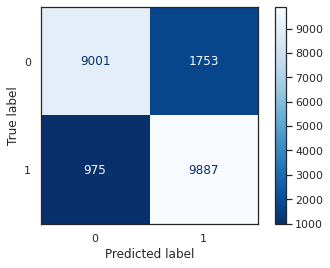

In [31]:
_=metrics.plot_confusion_matrix(randomF_model,xTest,yTest,cmap='Blues_r')

/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


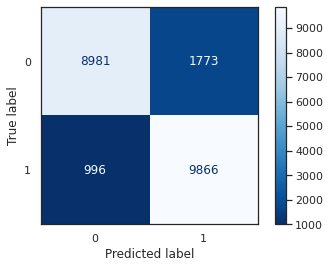

In [32]:
_=metrics.plot_confusion_matrix(ada_model,xTest,yTest,cmap='Blues_r')

/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


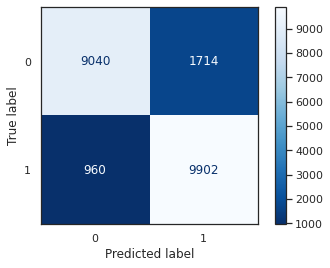

In [33]:
_=metrics.plot_confusion_matrix(lgbm_model,xTest,yTest,cmap='Blues_r')

In [34]:
print('f1 score of LGBM:',metrics.f1_score(yTest,lgbm_model.predict(xTest)))
print('f1 score of Adaboost:',metrics.f1_score(yTest,ada_model.predict(xTest)))
print('f1 score of RandomForest:',metrics.f1_score(yTest,randomF_model.predict(xTest)))

f1 score of LGBM: 0.8810392383664026
f1 score of Adaboost: 0.8769388027198791
f1 score of RandomForest: 0.8787663318816106


In [35]:
lgbm_model.predict_proba(xTest)[-1][1]

0.8362623901058518

In [36]:
lgbm_model.predict(xTest)

array([0, 0, 1, ..., 1, 1, 1])

In [37]:
Final_result=pd.DataFrame(data=[round(lgbm_model.predict_proba(xTest)[:][1],4),Product_Activation],columns=['Propensity','Product_Activation'])

TypeError: type numpy.ndarray doesn't define __round__ method

In [ ]:
lgbm_model.predict_proba(xTest)

In [57]:
pd.DataFrame({'Propensity':[pd.DataFrame(lgbm_model.predict_proba(xTest))[1]],'Product_Activation':[lgbm_model.predict(xTest)]})

,Propensity,Product_Activation
0,0 0.117899 1 0.005664 2 0...,"[0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, ..."


In [69]:
v=pd.DataFrame(lgbm_model.predict_proba(xTest))[1]

In [77]:
pd.DataFrame(lgbm_model.predict(xTest),v)

,0
1,
0.117899,0
0.005664,0
0.785983,1
0.815479,1
0.004194,0
...,...
0.770652,1
0.803533,1
0.612369,1
